### Workspace

In [25]:
%matplotlib notebook

from modsim import *

In [26]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian

In [27]:
force_mag = .5 * m * kg /s**2
angle = 45 * degree
mass = .3 * kg

angle_rad = angle.to(radian)
fx, fy = pol2cart(angle_rad, force_mag)
force = Vector(fx, fy)
a_force = force/mass

In [162]:
condition = Condition(height = 600,
                      t_on = 200,
                      g = 9.8,
                      mass = 1,
                      length = .2,
                      width = .1,
                      rho = 1.2,
                      C_d = 1,
                      duration = 40,
                      C_t = 20)

In [163]:
def make_system(condition):
    unpack(condition)
    
    # make the initial state
    init = State(height=height, v=0)
    
    # compute area from diameter
    area = length * width
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, t_on=t_on, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, C_t=C_t, ts=ts)

In [164]:
def slope_func(state, t, system):
    height, v = state
    unpack(system)
    
    a_grav = -g
    
    f_drag = -rho * abs(v) * v * C_d * area / 2
    a_drag = f_drag / mass
    
    print(f_drag)
    if(height < t_on):
        f_thrust = C_t
    else:
        f_thrust = 0
    a_thrust = f_thrust / mass
    
    a = a_grav + a_drag + a_thrust
    
    return v, a

In [165]:
test = make_system(condition)
run_odeint(test, slope_func)
def plot_height(results):
    newfig()
    unpack(results)
    
    plot(height, label='y')
        
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')
    
def plot_velocity(results):
    newfig()
    unpack(results)
    
    plot(v, label='v')
    
    decorate(xlabel='Time (s)',
             ylabel='Velocity (m)')

-0.0
-0.0
1.67888698563e-10
1.67888698557e-10
6.71554794229e-10
6.71554794194e-10
1.08589681706e-05
1.08589563733e-05
4.30948676566e-05
4.30948208387e-05
9.67080538094e-05
9.6707983676e-05
0.00180841144931
0.00180839883398
0.000669102412125
0.000669100564162
0.000170059374558
0.00017005933728
0.000263975061414
0.000263975107863
0.00037845451272
0.000378454512724
0.000513496590939
0.000513496590945
0.000845264060872
0.000845264060946
0.00125926637914
0.00125926637936
0.00175548964726
0.00175548964758
0.00233391720747
0.00233391720791
0.00867819170382
0.00867819240597
0.0190342709891
0.0190342762185
0.033385177776
0.0333851896211
0.0517074280429
0.0517074484356
0.0482636898962
0.048263701374
0.065844771888
0.0658447849101
0.0861088151214
0.0861088333028
0.109033290059
0.109033313574
0.142969169575
0.14296921769
0.181343471529
0.181343453972
0.224084095737
0.224084093042
0.271111512051
0.27111152693
0.322338770057
0.322338785614
0.42892766542
0.42892777365
0.549159778985
0.549159812791
0.

-1.66053025742
-1.66053025731
-1.68193109105
-1.66310444701
-1.68193109092
-1.6610191386
-1.66480374844
-1.66480374802
-1.66908058744
-1.66406905724
-1.66554133558
-1.66554127183
-1.66627895898
-1.66455042609
-1.66554612387
-1.66554612387
-1.66555097592
-1.66555097591
-1.66556068001
-1.66557038413
-1.66558008826
-1.66567713054
-1.66577417453
-1.66587122026
-1.6659682677
-1.66693883691
-1.66599103585
-1.66693883691
-1.66580150798
-1.66616236997
-1.6657074934
-1.6659682677
-1.66598767742
-1.66594218975
-1.6659682677
-1.66597020867
-1.66597020867
-1.66597214964
-1.66597214964
-1.6659740906
-1.6659740906
-1.66597603157
-1.66597603157
-1.66597797254
-1.66597797254
-1.66598185448
-1.6659773057
-1.66598185448
-1.66597275692
-1.66597832456
-1.66597867658
-1.66597938063
-1.66598008467
-1.66598078871
-1.66598782915
-1.6659795793
-1.66598782915
-1.66597132946
-1.66598126279
-1.66598015177
-1.66598078871
-1.66598083612
-1.66598088353
-1.66598077243
-1.66598087502
-1.66598091392
-1.66598082275
-1.6

<IPython.core.display.Javascript object>


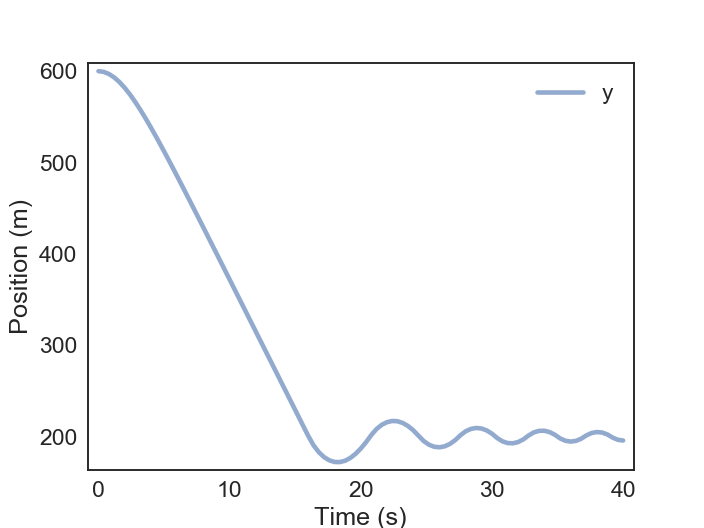

In [166]:
plot_height(test.results)

<IPython.core.display.Javascript object>


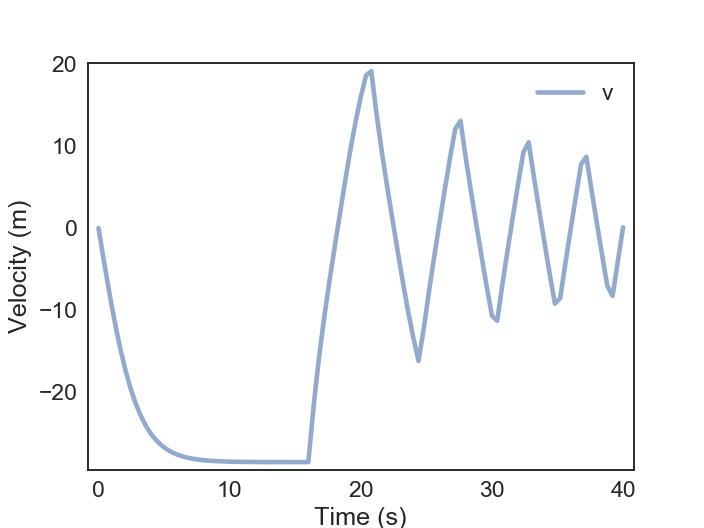

In [167]:
plot_velocity(test.results)

In [169]:
func = interp_inverse(test.results.v)
fsolve(func, 15)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([ 16.12491597])

In [170]:
thing = func(-14)
thing

array(8.340961942754447)

In [171]:
y = interpolate(test.results.height)

In [172]:
y(thing)

array(419.12538281949185)

In [173]:
def height_at_velocity(system, velocity=-68):
    t = interp_inverse(system.results.v)
    time = t(velocity)
    y = interpolate(system.results.height)
    heightt = y(time)
    return heightt

In [174]:
height_at_velocity(test, -25)

array(539.4501055022594)

In [175]:
%psource interp_inverse

In [78]:
%psource interpolate